In [26]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import pydicom
import os

def plot_and_save_intensity_distribution(image_path, output_dir="histograms", plot_images_with_histograms=True):
    """
    Plots and saves the intensity distribution of an image.
    Supports PNG and DICOM formats.

    Parameters:
        image_path (str): Path to the image file (PNG or DICOM).
        output_dir (str): Directory to save the histogram plots.
        plot_images_with_histograms (bool): If True, plot the image alongside its histogram.

    Returns:
        dict: A dictionary with raw statistics (mean and sum).
    """
    import inspect

    # Extract the variable name from the calling function
    caller_frame = inspect.currentframe().f_back
    variable_name = None
    for name, value in caller_frame.f_locals.items():
        if value == image_path:
            variable_name = name
            break
    if variable_name is None:
        variable_name = "UNKNOWN"

    # Format the variable name (remove '_path' if exists)
    descriptive_title = variable_name.replace("_path", "").replace("_", " ").upper()

    # Create the output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

    # Check the file extension
    file_extension = image_path.split('.')[-1].lower()

    # Load the image
    if file_extension == 'png':
        # Load PNG image
        image = Image.open(image_path).convert("L")  # Convert to grayscale
        image_array = np.array(image)
    elif file_extension in ['dcm', 'dicom']:
        # Load DICOM image
        dicom_image = pydicom.dcmread(image_path)
        image_array = dicom_image.pixel_array
    else:
        raise ValueError(f"Unsupported file format: {file_extension}")

    # Compute raw statistics
    raw_sum = np.sum(image_array)
    raw_mean = np.mean(image_array)

    # Compute histogram dynamically based on intensity range
    min_val = np.min(image_array)
    max_val = np.max(image_array)
    bins = np.linspace(min_val, max_val, num=256)
    hist, bin_edges = np.histogram(image_array.ravel(), bins=bins)

    if plot_images_with_histograms:
        # Plot image and histogram side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Plot the image
        axes[0].imshow(image_array, cmap="gray")
        axes[0].set_title(f"Image: {os.path.basename(image_path)}", fontsize=10)
        axes[0].text(
            0.5, -0.1, descriptive_title, fontsize=12, ha='center', transform=axes[0].transAxes
        )
        axes[0].axis("off")

        # Plot the histogram
        axes[1].bar(bin_edges[:-1], hist, width=np.diff(bin_edges)[0], color='blue', alpha=0.7)
        axes[1].set_title("Intensity Distribution")
        axes[1].set_xlabel("Intensity")
        axes[1].set_ylabel("Frequency")
        axes[1].grid(True)

        # Add text for raw statistics
        text_x = 0.95 * max(bin_edges)  # Slightly to the left of the plot edge
        text_y = 0.95 * max(hist)  # Slightly below the top of the plot
        axes[1].text(
            text_x, text_y,
            f"Raw Mean: {raw_mean:.2f}\nRaw Sum: {int(raw_sum)}",
            ha="right", va="top", fontsize=10, bbox=dict(facecolor="white", alpha=0.7)
        )

        # Adjust layout and show
        plt.tight_layout()
        plt.show()

    # Save the histogram plot
    output_path = os.path.join(output_dir, f"{os.path.basename(image_path)}_histogram.png")
    plt.figure(figsize=(8, 6))
    plt.bar(bin_edges[:-1], hist, width=np.diff(bin_edges)[0], color='blue', alpha=0.7)
    plt.title(f"Intensity Distribution for {os.path.basename(image_path)}")
    plt.xlabel("Intensity")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.savefig(output_path)
    plt.close()

    print(f"Histogram saved to {output_path}")

    return {
        "raw_mean": raw_mean,
        "raw_sum": raw_sum,
    }

In [27]:
def plot_histogram_difference(hist1, hist2, output_path="histogram_difference.png", add_labels=True):
    
    # Compute the difference
    hist_diff = hist1 - hist2

    # Plot the histogram difference
    plt.figure(figsize=(8, 6))
    bars = plt.bar(range(len(hist_diff)), hist_diff, color='red', alpha=0.7)
    plt.title("Histogram Difference")
    plt.xlabel("Intensity Bin")
    plt.ylabel("Difference")
    plt.grid(True)

    if add_labels:
        # Add text labels for nonzero differences
        for i, diff in enumerate(hist_diff):
            if diff != 0:
                plt.text(
                    i,  # x-coordinate
                    diff + (0.5 if diff > 0 else -0.5),  # y-coordinate slightly offset for visibility
                    f"{int(round(diff))}",  # Text label
                    ha='center',  # Horizontal alignment
                    va='bottom' if diff > 0 else 'top',  # Vertical alignment
                    rotation=90,  # Rotate label
                    fontsize=8  # Font size
                )

    # Save the difference plot
    plt.savefig(output_path)
    plt.close()

    print(f"Histogram difference saved to {output_path}")

In [28]:
pet_dicom_path=r"D:\Masters_PET_Images\P01\MAC_FDG30min_Sharp\ATLATEPP1_ATLA.PT.TEP_IRM_CERVEAU.4.27.2023.04.12.16.31.59.773.69281380.dcm"
mri_dicom_path=r"D:\Masters_PET_Images\P01\Ax T1 BRAVO\ATLATEPP1_ATLA.MR.TEP_IRM_CERVEAU.800.334.2023.04.12.16.31.59.773.69290719.dcm"

pet_png_path=r"D:\Masters_PET_Images\Paired_PET_MRI\P01_Paired\P01_Pair20_PET_Depth29.24mm.png"
mri_png_path=r"D:\Masters_PET_Images\Paired_PET_MRI\P01_Paired\P01_Pair20_MRI_Depth28.82mm.png"

pet_png_centered_path = r"D:\2_29JuneData\DL_Output_PNG\P01_Pg_DL_PET_MRI\PET\P01_Pair12_PET_Depth29.24mm.png"
pet_png_centered_deskulled_path = r"D:\2_29JuneData\DL_Output_PNG\P01_Pg_DL_PET_MRI\PET_deskulled\P01_Pair12_PET_Depth29.24mm.png"
mri_png_centered_path = r"D:\2_29JuneData\DL_Output_PNG\P01_Pg_DL_PET_MRI\MRI\P01_Pair12_MRI_Depth28.82mm.png"
dl_png_centered_path= r"D:\2_29JuneData\DL_Output_PNG\P01_Pg_DL_PET_MRI\DL\P01_Pair12_PET_Depth29.24mm.png"
dl_png_centered_masked_path= r"D:\2_29JuneData\DL_Output_PNG\P01_Pg_DL_PET_MRI\DL_masked\P01_Pair12_PET_Depth29.24mm.png"
dl_png_centered_masked_binary_path=r"D:\2_29JuneData\DL_Output_PNG\Total_DL_Masked_450_org\Enhanced_Images\P01_Pair12_PET_Depth29.24mm.png"

emd_binary_dl_target_png=r"D:\2_29JuneData\DL_Output_PNG\OT_HR_PET_Images_T3\force_1_orig\P01_Pair12_PET_Depth29.24mm.png"
emd_prob_dl_target_png=r"D:\2_29JuneData\DL_Output_PNG\OT_HR_PET_Images_T3\z_SinkhornEMD\Past EMD\P01_Pair12_PET_Depth29.24mm.png"
emd_force_35_binary_dl_target_png=r"D:\2_29JuneData\DL_Output_PNG\OT_HR_PET_Images_T3\force_0.34\P01_Pair12_PET_Depth29.24mm.png"
emd_force_35_binary_dl_target_normalized_png=r"D:\2_29JuneData\DL_Output_PNG\OT_HR_PET_Images_T3\force_0.34\Normalized\P01_Pair12_PET_Depth29.24mm.png"
sinkhorn_emd_png=r"D:\2_29JuneData\DL_Output_PNG\OT_HR_PET_Images_T3\z_SinkhornEMD\P01_Pair12_PET_Depth29.24mm.png"

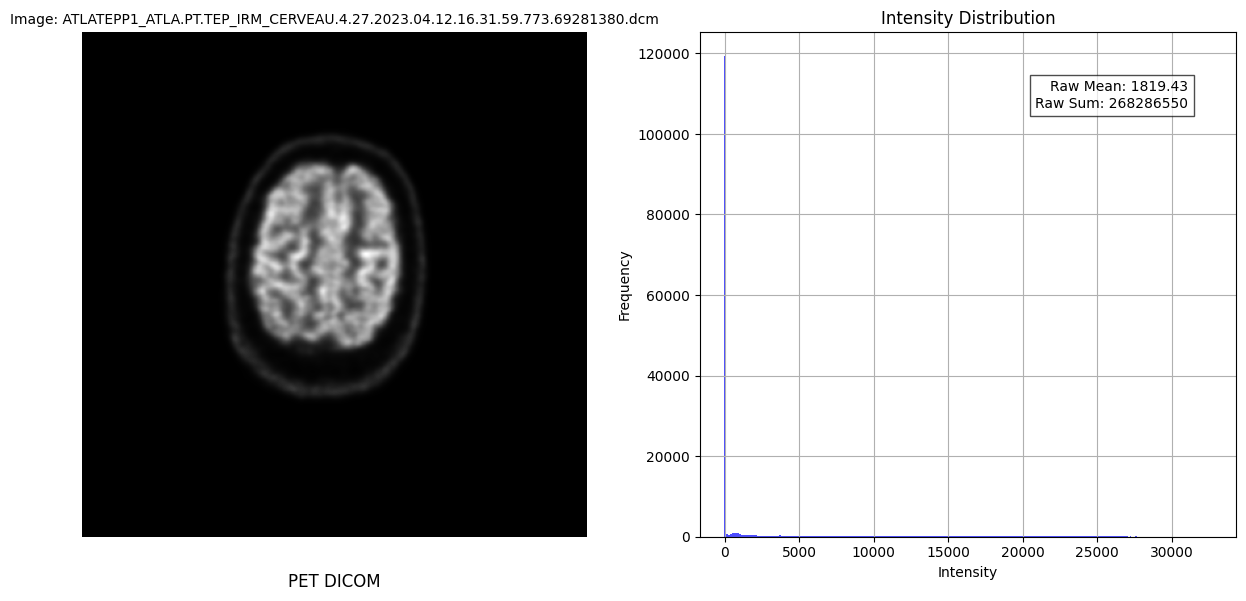

Histogram saved to histograms\ATLATEPP1_ATLA.PT.TEP_IRM_CERVEAU.4.27.2023.04.12.16.31.59.773.69281380.dcm_histogram.png


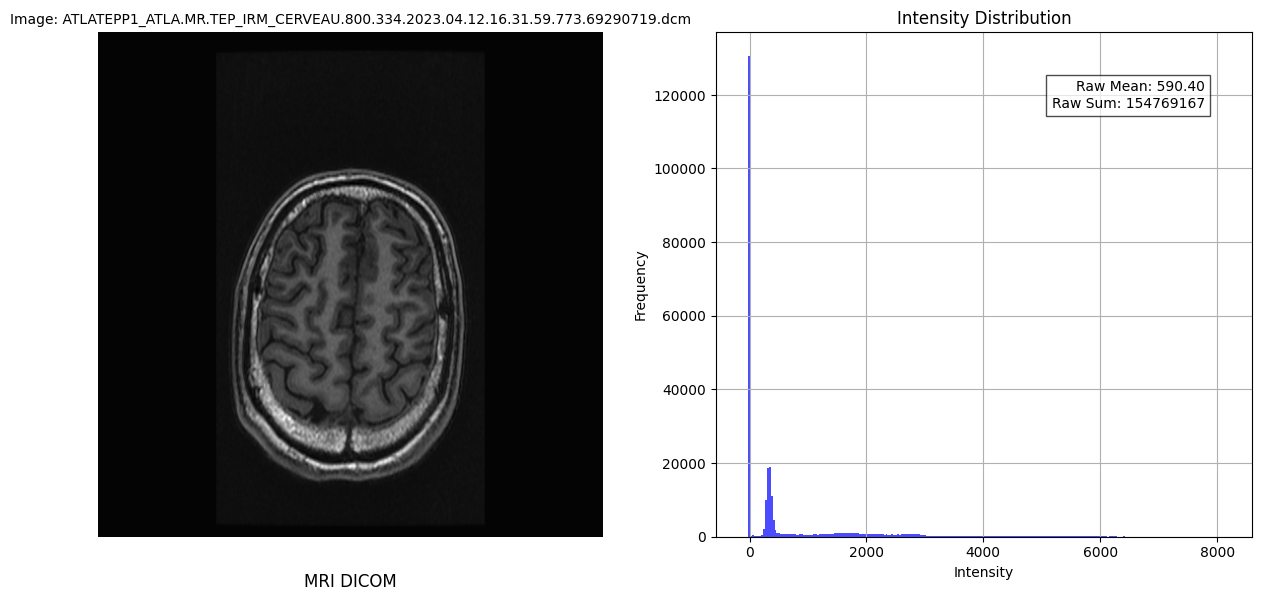

Histogram saved to histograms\ATLATEPP1_ATLA.MR.TEP_IRM_CERVEAU.800.334.2023.04.12.16.31.59.773.69290719.dcm_histogram.png


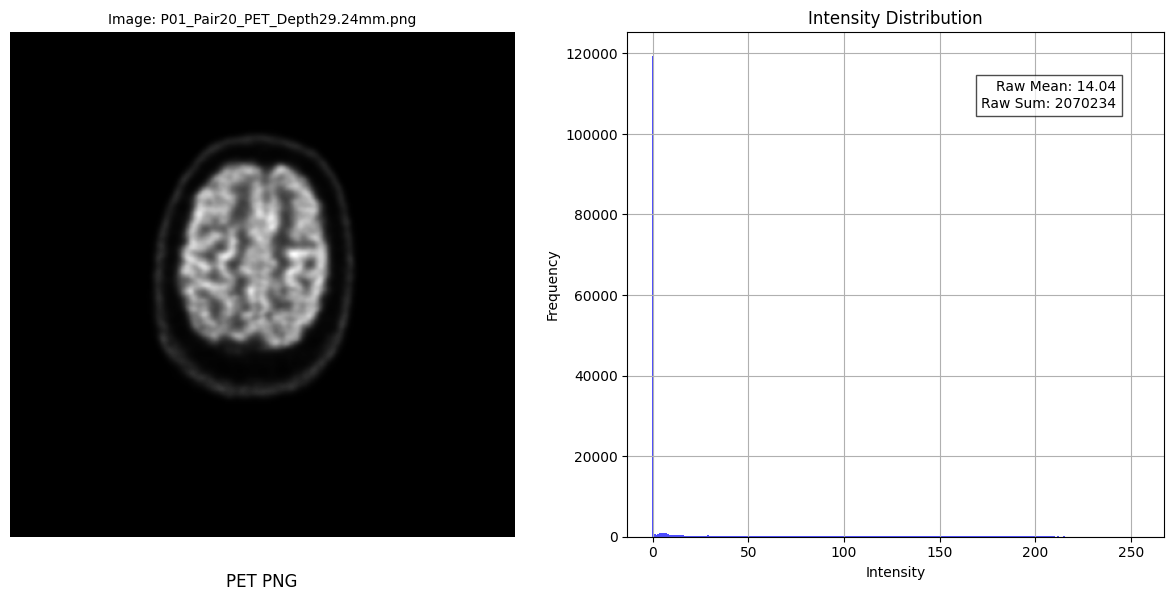

Histogram saved to histograms\P01_Pair20_PET_Depth29.24mm.png_histogram.png


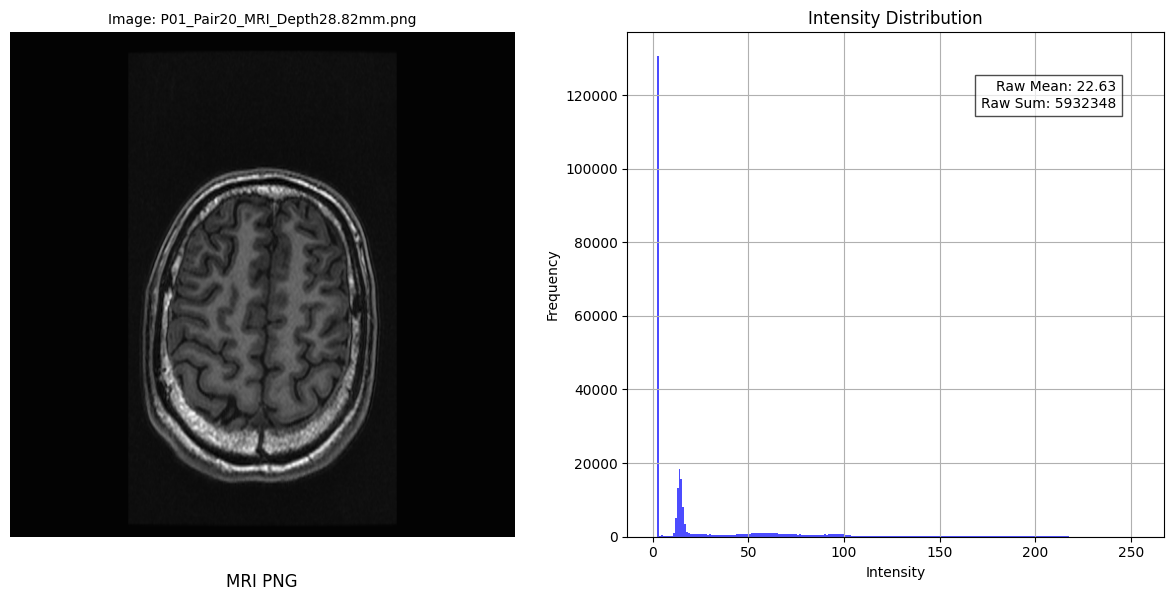

Histogram saved to histograms\P01_Pair20_MRI_Depth28.82mm.png_histogram.png


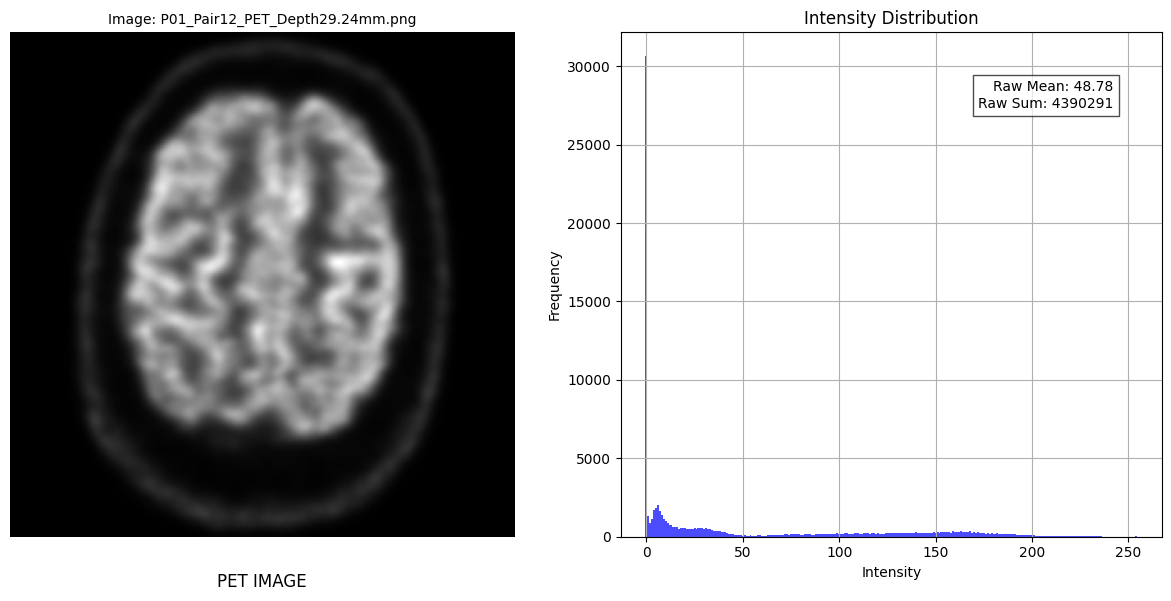

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


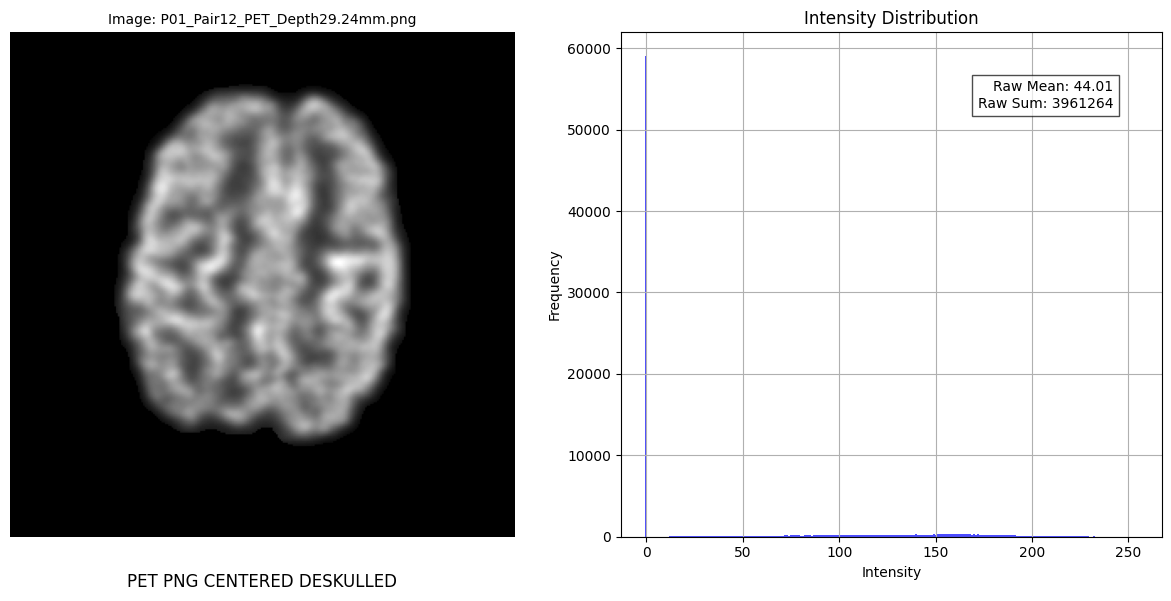

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


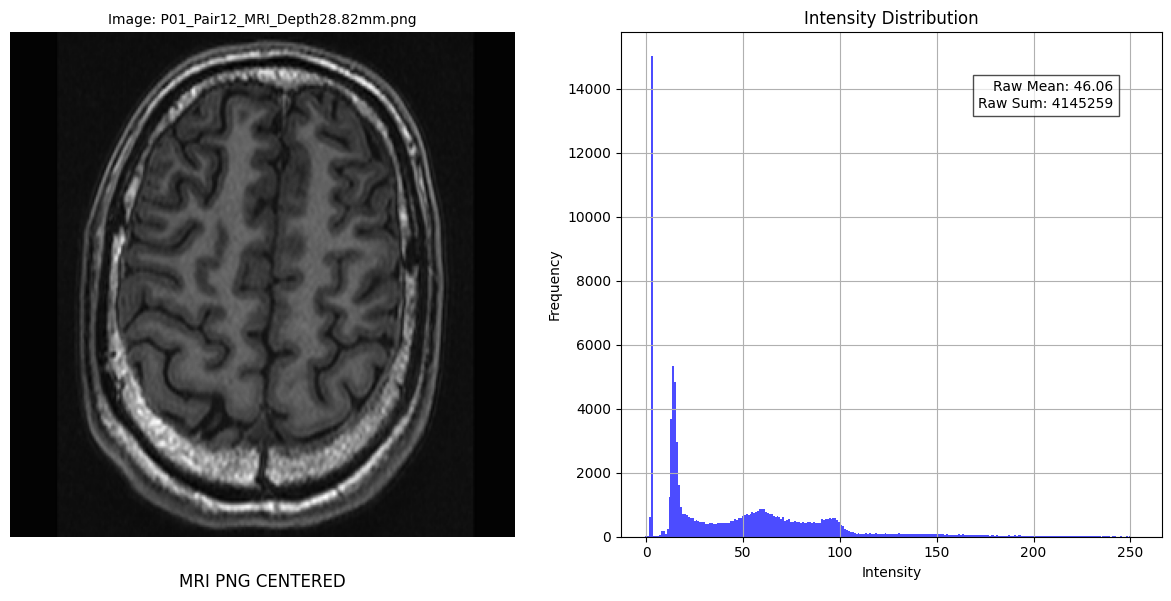

Histogram saved to histograms\P01_Pair12_MRI_Depth28.82mm.png_histogram.png


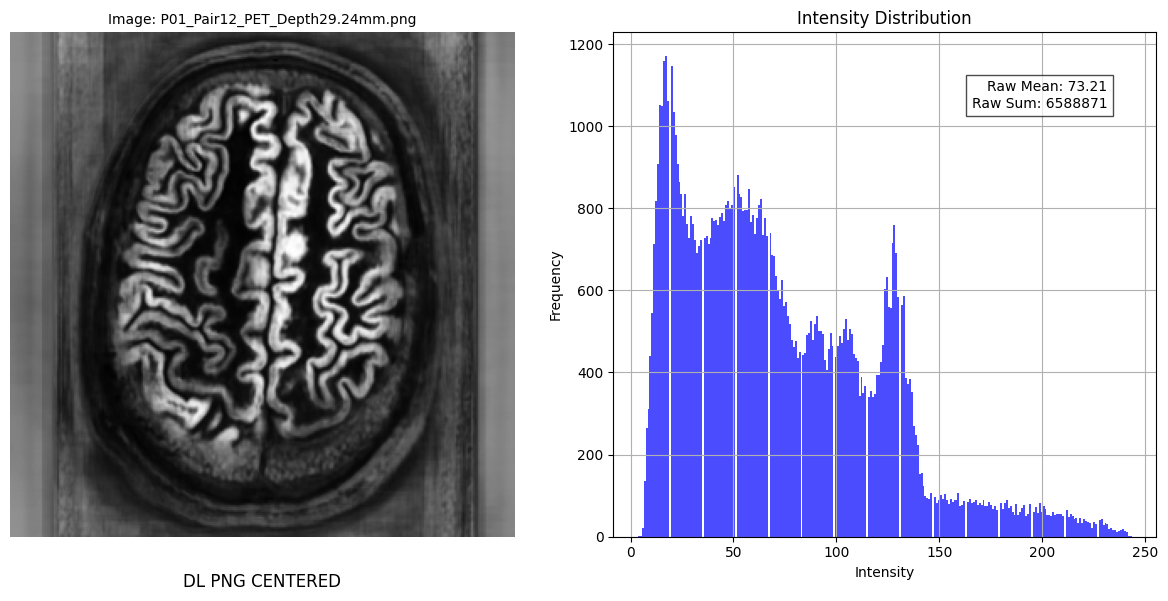

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


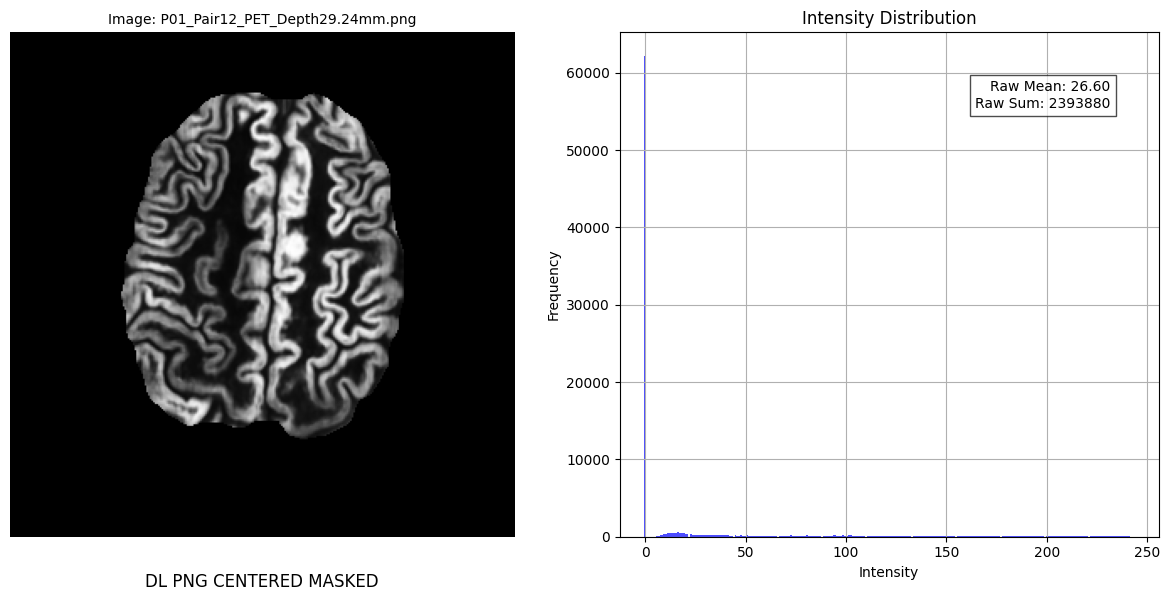

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


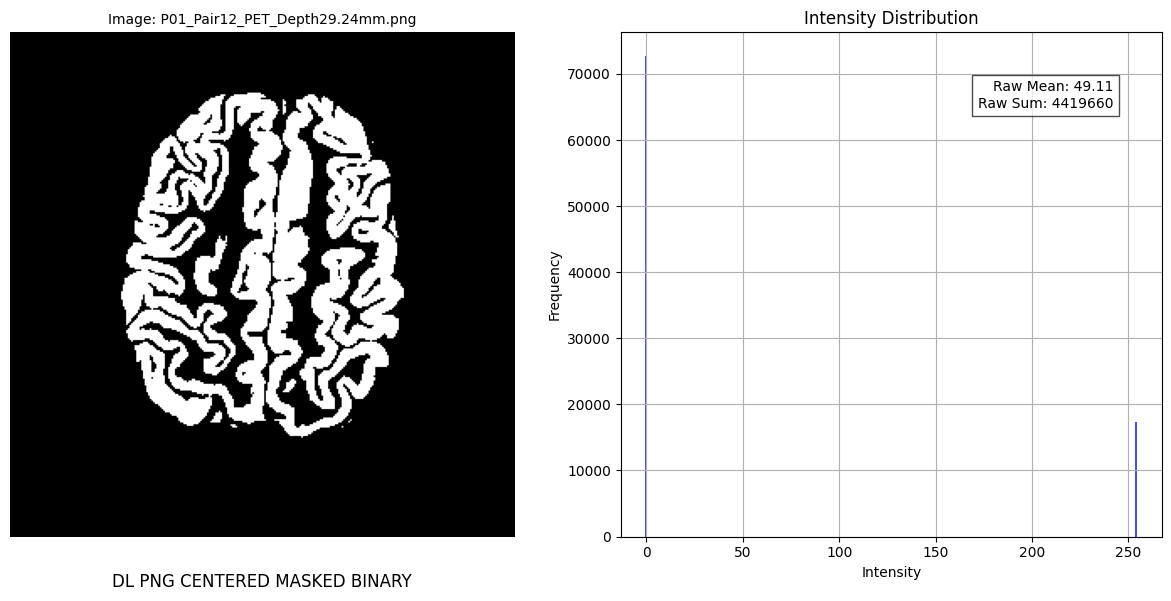

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


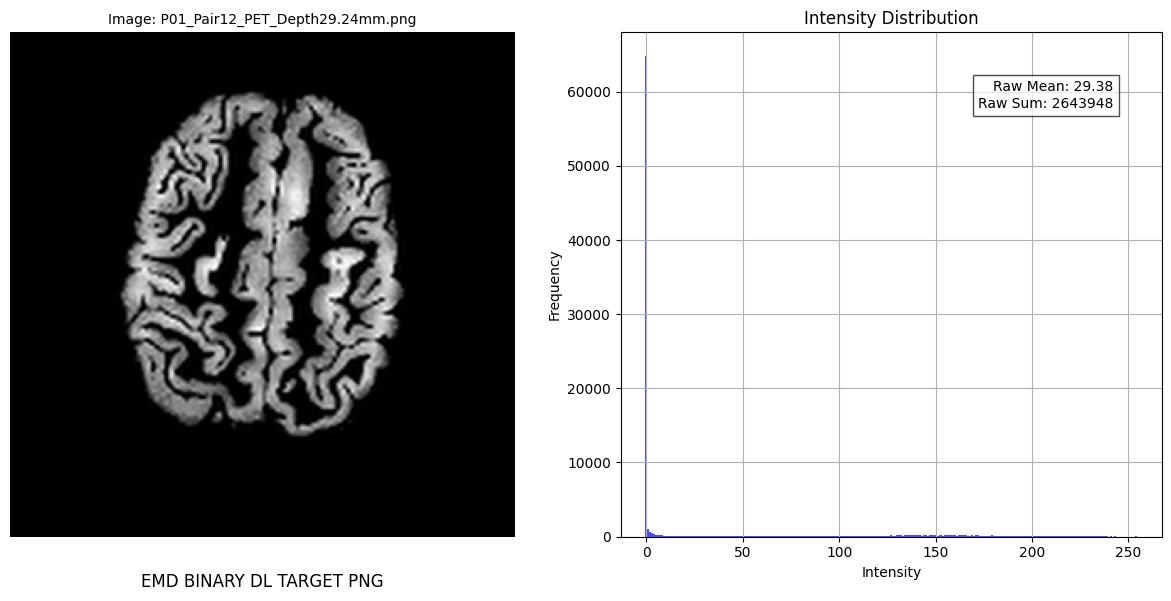

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


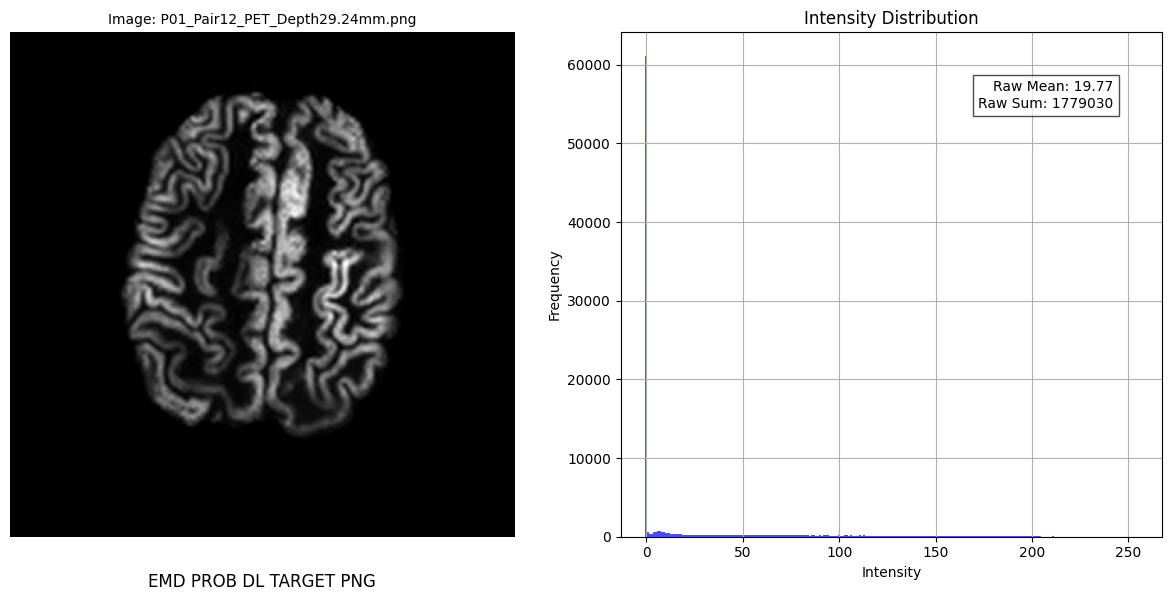

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


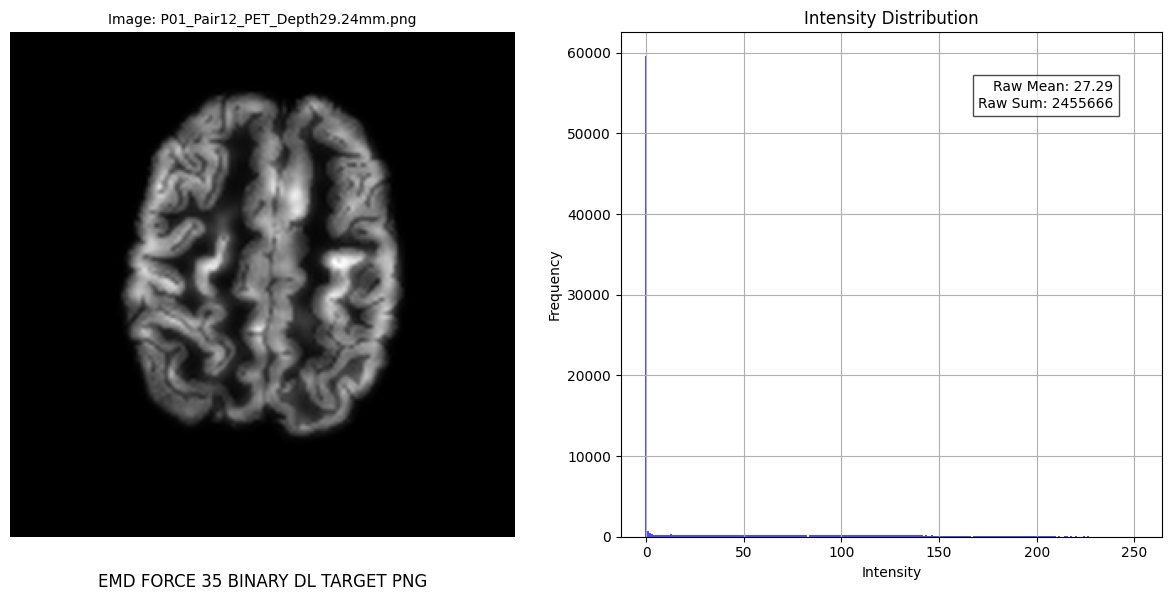

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


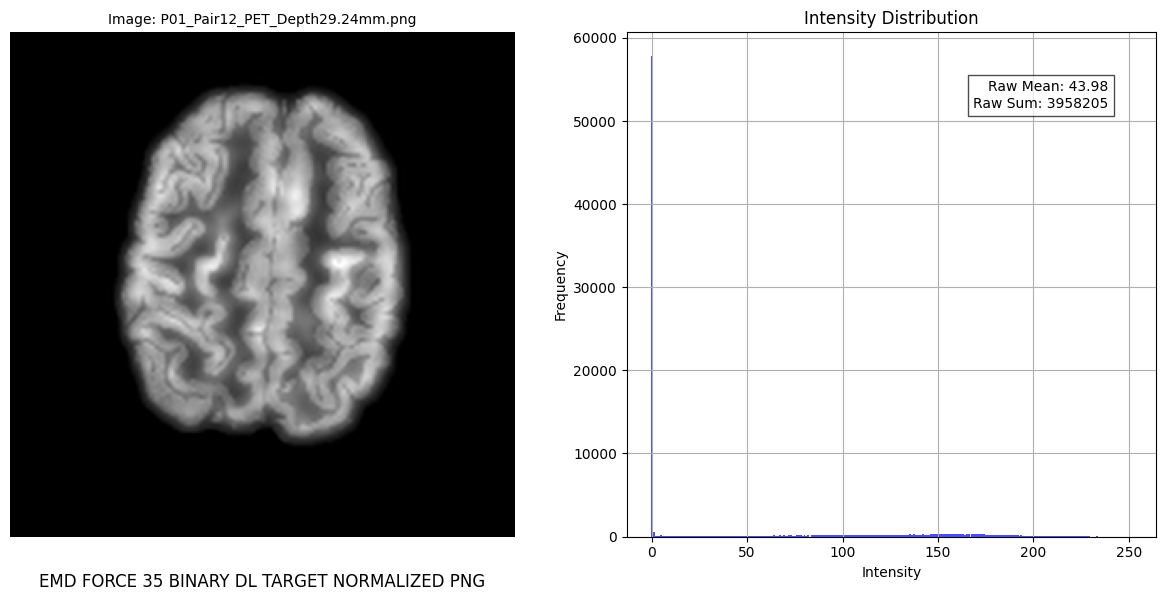

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


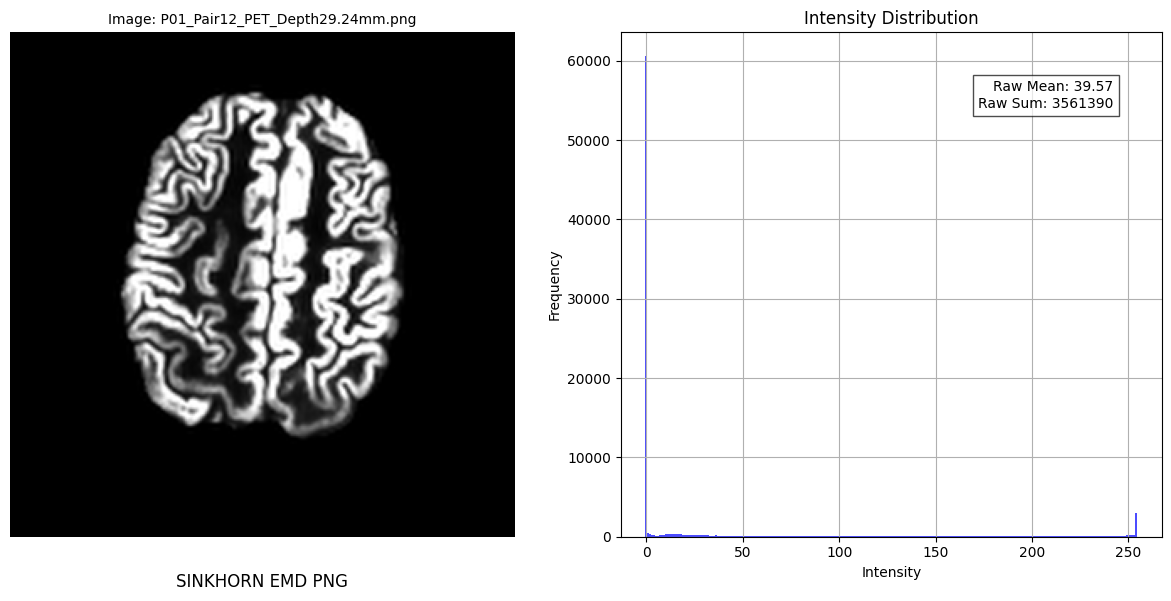

Histogram saved to histograms\P01_Pair12_PET_Depth29.24mm.png_histogram.png


In [30]:
# Call the function for each path
hist_pet_dicom = plot_and_save_intensity_distribution(pet_dicom_path)
hist_mri_dicom = plot_and_save_intensity_distribution(mri_dicom_path)
hist_pet_png = plot_and_save_intensity_distribution(pet_png_path)
hist_mri_png = plot_and_save_intensity_distribution(mri_png_path)
hist_pet_png_centered = plot_and_save_intensity_distribution(pet_png_centered_path)
hist_pet_png_centered_deskulled = plot_and_save_intensity_distribution(pet_png_centered_deskulled_path)
hist_mri_png_centered = plot_and_save_intensity_distribution(mri_png_centered_path)
hist_dl_png_centered = plot_and_save_intensity_distribution(dl_png_centered_path)
hist_dl_png_centered_masked = plot_and_save_intensity_distribution(dl_png_centered_masked_path)
hist_dl_png_centered_masked_binary = plot_and_save_intensity_distribution(dl_png_centered_masked_binary_path)
hist_emd_binary_dl_target = plot_and_save_intensity_distribution(emd_binary_dl_target_png)
hist_emd_prob_dl_target = plot_and_save_intensity_distribution(emd_prob_dl_target_png)
hist_emd_force_35_binary_dl_target = plot_and_save_intensity_distribution(emd_force_35_binary_dl_target_png)
hist_emd_force_35_binary_dl_target_normalized = plot_and_save_intensity_distribution(emd_force_35_binary_dl_target_normalized_png)
hist_sinkhorn_emd = plot_and_save_intensity_distribution(sinkhorn_emd_png)